# Analyse der Gaußverteilung

In [10]:
using Revise, Plots
includet("run_tools.jl")
using .RunTools

In [11]:
#Definiere Inputpfade
in_path_P6_500 = "Data/messung_500V_P6_2700.txt";
in_path_P67_500 = "Data/messung_500V_P67_2700.txt";
in_path_P6_600 = "Data/messung_600V_P6_2700.txt";

#Definiere Outputpfade
out_path_P6_500 = "out/binomial/gauß/P6_500.txt";
out_path_P67_500 = "out/binomial/gauß/P67_500.txt";
out_path_P6_600 = "out/binomial/gauß/P6_600.txt";

## Extrahiere die Binomialverteilungen

In [12]:
#Extrahiere Binomialverteilung für Probe 6 bei 500V
D_t_P6_500 = 5.0;
b_P6_500 = 3;
data_P6_500 = run_binomial(in_path_P6_500, D_t_P6_500, b_P6_500, out_path_P6_500);

#Extrahiere Binomialverteilung für Probe 6 und 7 bei 500V
D_t_P67_500 = 5.0;
b_P67_500 = 3;
data_P67_500 = run_binomial(in_path_P67_500, D_t_P67_500, b_P67_500, out_path_P67_500);

#Extrahiere Binomialverteilung für Probe 6 bei 600V
D_t_P6_600 = 5.0; 
b_P6_600 = 3;
data_P6_600 = run_binomial(in_path_P6_600, D_t_P6_600, b_P6_600, out_path_P6_600);

## Funktionen zur Berechnung aller Parameter und erstellen der Plots

In [13]:
function get_counts(path_to_raw_data::String)
    raw_data = read_txt_file(path_to_raw_data)
    counts = size(raw_data)[1]
    return counts/2700
end;


calc_z(data, path_to_raw_data) = get_counts(path_to_raw_data);
calc_m(z, D_t, b) = z * D_t / b;
calc_N(data) = sum(data[:,2]);
calc_sigma_sq(data,N,m) = 1/(N-1) * sum((data[:,1] .- m).^2 .* data[:,2]);


struct GaußDist
    z::Float64
    N::Int
    m::Float64
    p::Array{Float64,1}
    sigma_sq::Float64
end;


function calc_theo_gauß(data,m,N,b)
    p = zeros(size(data)[1])
    for i in 1:size(data)[1]
        p[i] = 1/sqrt(2*pi*m) * N * sqrt(b) * exp(-(data[i,1] - m)^2/(2*m/b))
    end
    return p
end;


function calc_parameters(data,D_t,b, path_to_raw_data)
    z = calc_z(data, path_to_raw_data)
    N = calc_N(data)
    m = calc_m(z,D_t,b)
    p = calc_theo_gauß(data,m,N,b)
    sigma_sq = calc_sigma_sq(data,N,m) 

    gauß_dist = GaußDist(z,N,m,p,sigma_sq)

    return gauß_dist
end;


function plot_data_and_theo(data,D_t,b,title::String, path_to_raw_data)
    fig = bar(
        data[:,1],data[:,2],
        label="Messung",
        xlabel="Anzahl der Kernzerfälle",
        ylabel="Anzahl der Intervalle",
        title=title,
        bar_width=0.8,
    )
    dist = calc_parameters(data,D_t, b, path_to_raw_data)
    plot!(data[:,1], dist.p, label="Theorie", seriestype=:steppost, lw=2)

    return fig, dist
end;


function print_params(dist::GaußDist)
    println("z = ", dist.z);
    println("N = ", dist.N);
    println("m = ", dist.m);
    println("σ² = ", dist.sigma_sq);
end;

## Plotte Ergebnisse

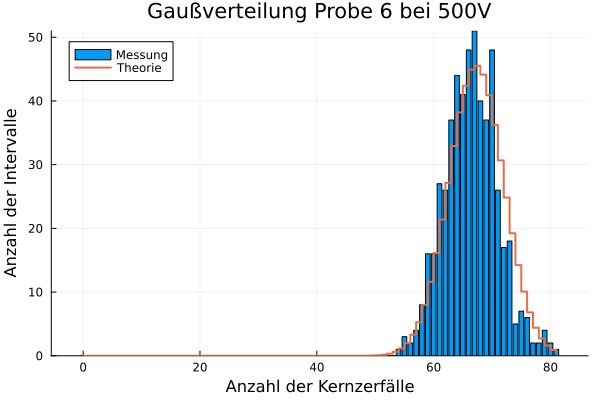

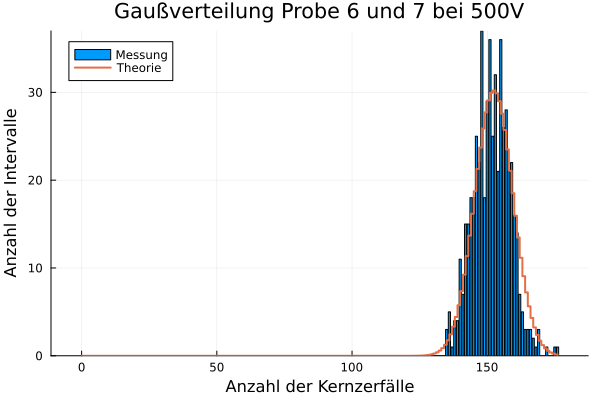

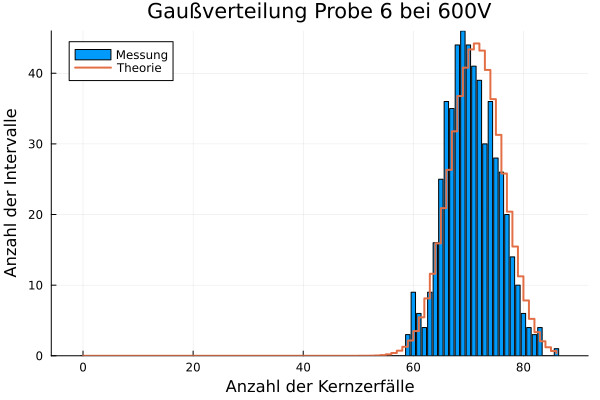

In [14]:
fig_P6_500, dist_P6_500 = plot_data_and_theo(
    data_P6_500,D_t_P6_500 ,b_P6_500 ,
    "Gaußverteilung Probe 6 bei 500V",
    "Data/messung_500V_P6_2700.txt"
);

fig_P67_500, dist_P67_500 = plot_data_and_theo(
    data_P67_500,D_t_P67_500 ,b_P67_500,
    "Gaußverteilung Probe 6 und 7 bei 500V",
    "Data/messung_500V_P67_2700.txt"
);

fig_P7_600, dist_P6_600 = plot_data_and_theo(
    data_P6_600,D_t_P6_600 ,b_P6_500,
    "Gaußverteilung Probe 6 bei 600V",
    "Data/messung_600V_P6_2700.txt"
);


display(fig_P6_500);
display(fig_P67_500);
display(fig_P7_600);

## Gebe alle Parameter aus

In [15]:
println("Probe 6 bei 500V");
print_params(dist_P6_500);

println("");

println("Probe 6 und 7 bei 500V");
print_params(dist_P67_500);

println("");

println("Probe 6 bei 600V");
print_params(dist_P6_600);

Probe 6 bei 500V
z = 40.080740740740744
N = 539
m = 66.80123456790123
σ² = 20.93870454227385

Probe 6 und 7 bei 500V
z = 91.17370370370371
N = 539
m = 151.9561728395062
σ² = 46.11301714351846

Probe 6 bei 600V
z = 42.571481481481484
N = 539
m = 70.95246913580247
σ² = 23.13510105266051


## Speichere Plots

In [16]:
savefig(fig_P6_500, "Plots/Gauß/P6_500.png");
savefig(fig_P67_500, "Plots/Gauß/P67_500.png");
savefig(fig_P7_600, "Plots/Gauß/P6_600.png");

In [17]:
x(phi, r) = r*cos(phi);
y(phi, r) = r*sin(phi);

x_ = x(deg2rad(240), 17);
y_ = y(deg2rad(240), 17);

println(x_);
println(y_);

-8.500000000000007
-14.722431864335455
